In [166]:
%matplotlib inline

import pymysql
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale

In [66]:
#Connect to the database
conn = pymysql.connect(host='104.196.5.55',
                             user='root',
                             db='nfl',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

In [141]:
#Create Offense dataframe with only WRs and relevant variables, create redzone dataframe

df_offense = pd.DataFrame(pd.read_sql('Select o.GID,o.PLAYER,p.PNAME,YEAR,o.TRG,o.REC,o.RECY,o.TDREC,o.FUML,o.FP3 from offense o INNER JOIN player p on o.player = p.PLAYER WHERE p.POS1 = "'"WR"'"',conn,params=None))
df_redzone = pd.DataFrame(pd.read_sql('Select PLAYER,GID,TRG AS REDTRG,REC AS REDREC,FUML AS REDFUML from redzone',conn,params=None))

#Create a merged all_offense dataframe

df_all_offense = pd.merge(df_offense,df_redzone,how='left',on=['PLAYER','GID'])
df_all_offense.fillna(0,inplace=True)

In [ ]:
#Add calculations for redzone targets/total targets, redzone receptions/total receptions

In [147]:
wr_games = df_all_offense.groupby('PNAME')['TRG'].count()

In [148]:
wr_games

PNAME
A.Allison        21
A.Armstrong      27
A.Arrington       5
A.Bannister      21
A.Battle         84
A.Benn           35
A.Binns           9
A.Black          23
A.Boldin        200
A.Bright          1
A.Brown         120
A.Bruce           2
A.Bryant        107
A.Caldwell       94
A.Chatman        76
A.Collie         51
A.Connell        27
A.Cooper         16
A.Davis          97
A.Dobson         22
A.Edwards        32
A.Freeman        65
A.Gonzalez       34
A.Green          79
A.Hakim          87
A.Harris          1
A.Hastings        2
A.Hawkins        60
A.Holmes         40
A.Humphries      11
               ... 
T.Williams       50
T.Williamson     48
T.Wilson          3
T.Wright         34
T.Young          27
V.Brisby          3
V.Brown          34
V.Cruz           56
V.Jackson       148
V.Mayle           1
V.Sutherland     19
V.Tucker          9
W.Blackwell       6
W.Buchanon        1
W.Chrebet        78
W.Franklin       11
W.Hayes           8
W.Jackson        45
W.McGarity    

In [154]:
wrs = df_all_offense.groupby('PNAME').agg(np.mean)

In [155]:
wrs

,GID,YEAR,TRG,REC,RECY,TDREC,FUML,FP3,REDTRG,REDREC,REDFUML
PNAME,,,,,,,,,,,
A.Allison,2107.476190,2007.523810,1.857143,0.857143,10.571429,0.000000,0.047619,2.171429,0.095238,0.047619,0.000
A.Armstrong,2918.703704,2010.518519,4.518519,2.000000,36.518519,0.185185,0.037037,6.907407,0.518519,0.222222,0.000
A.Arrington,3075.200000,2010.800000,3.800000,2.200000,26.200000,0.000000,0.000000,4.820000,0.200000,0.200000,0.000
A.Bannister,848.571429,2002.761905,1.333333,0.476190,6.142857,0.047619,0.000000,1.376190,0.142857,0.047619,0.000
A.Battle,1836.690476,2006.488095,3.678571,2.119048,25.595238,0.130952,0.071429,5.699762,0.380952,0.238095,0.000
A.Benn,2979.742857,2010.800000,2.714286,1.685714,24.628571,0.142857,0.000000,5.217143,0.371429,0.257143,0.000
A.Binns,3284.888889,2012.000000,4.444444,2.666667,30.777778,0.111111,0.111111,6.300000,0.777778,0.333333,0.000
A.Black,447.608696,2001.217391,1.130435,0.608696,6.173913,0.000000,0.043478,1.443478,0.000000,0.000000,0.000
A.Boldin,2603.460000,2009.290000,8.795000,5.385000,71.140000,0.410000,0.065000,15.727300,0.985000,0.585000,0.005


In [156]:
wrs['games'] = wr_games

In [157]:
wrs

,GID,YEAR,TRG,REC,RECY,TDREC,FUML,FP3,REDTRG,REDREC,REDFUML,games
PNAME,,,,,,,,,,,,
A.Allison,2107.476190,2007.523810,1.857143,0.857143,10.571429,0.000000,0.047619,2.171429,0.095238,0.047619,0.000,21
A.Armstrong,2918.703704,2010.518519,4.518519,2.000000,36.518519,0.185185,0.037037,6.907407,0.518519,0.222222,0.000,27
A.Arrington,3075.200000,2010.800000,3.800000,2.200000,26.200000,0.000000,0.000000,4.820000,0.200000,0.200000,0.000,5
A.Bannister,848.571429,2002.761905,1.333333,0.476190,6.142857,0.047619,0.000000,1.376190,0.142857,0.047619,0.000,21
A.Battle,1836.690476,2006.488095,3.678571,2.119048,25.595238,0.130952,0.071429,5.699762,0.380952,0.238095,0.000,84
A.Benn,2979.742857,2010.800000,2.714286,1.685714,24.628571,0.142857,0.000000,5.217143,0.371429,0.257143,0.000,35
A.Binns,3284.888889,2012.000000,4.444444,2.666667,30.777778,0.111111,0.111111,6.300000,0.777778,0.333333,0.000,9
A.Black,447.608696,2001.217391,1.130435,0.608696,6.173913,0.000000,0.043478,1.443478,0.000000,0.000000,0.000,23
A.Boldin,2603.460000,2009.290000,8.795000,5.385000,71.140000,0.410000,0.065000,15.727300,0.985000,0.585000,0.005,200


In [158]:
k = list(range(3,11))

In [159]:
scores = dict.fromkeys(k)

In [160]:
data = scale(wrs[['TRG','REC','RECY','TDREC','FUML','FP3','REDTRG','REDREC']].values)

In [162]:
for size in k:
    kmeans = KMeans(n_clusters=size)
    kmeans.fit(data)
    scores[size] = silhouette_score(data,kmeans.labels_)

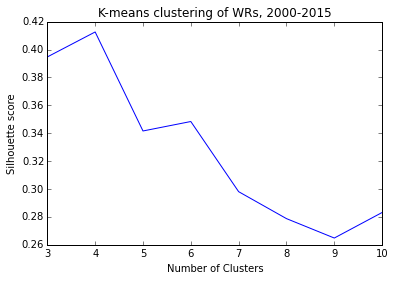

In [169]:
plt.plot(k,scores.values())
plt.title('K-means clustering of WRs, 2000-2015')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette score')

In [170]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [171]:
clusters = pd.DataFrame(kmeans.cluster_centers_,
                       columns=['TRG','REC','RECY','TDREC','FUML','FP3','REDTRG','REDREC'])

In [172]:
wrs['cluster']=kmeans.labels_

In [173]:
wrs

,GID,YEAR,TRG,REC,RECY,TDREC,FUML,FP3,REDTRG,REDREC,REDFUML,games,cluster
PNAME,,,,,,,,,,,,,
A.Allison,2107.476190,2007.523810,1.857143,0.857143,10.571429,0.000000,0.047619,2.171429,0.095238,0.047619,0.000,21,1
A.Armstrong,2918.703704,2010.518519,4.518519,2.000000,36.518519,0.185185,0.037037,6.907407,0.518519,0.222222,0.000,27,0
A.Arrington,3075.200000,2010.800000,3.800000,2.200000,26.200000,0.000000,0.000000,4.820000,0.200000,0.200000,0.000,5,0
A.Bannister,848.571429,2002.761905,1.333333,0.476190,6.142857,0.047619,0.000000,1.376190,0.142857,0.047619,0.000,21,1
A.Battle,1836.690476,2006.488095,3.678571,2.119048,25.595238,0.130952,0.071429,5.699762,0.380952,0.238095,0.000,84,0
A.Benn,2979.742857,2010.800000,2.714286,1.685714,24.628571,0.142857,0.000000,5.217143,0.371429,0.257143,0.000,35,0
A.Binns,3284.888889,2012.000000,4.444444,2.666667,30.777778,0.111111,0.111111,6.300000,0.777778,0.333333,0.000,9,0
A.Black,447.608696,2001.217391,1.130435,0.608696,6.173913,0.000000,0.043478,1.443478,0.000000,0.000000,0.000,23,1
A.Boldin,2603.460000,2009.290000,8.795000,5.385000,71.140000,0.410000,0.065000,15.727300,0.985000,0.585000,0.005,200,2


In [183]:
wrs[wrs.cluster==2]

,GID,YEAR,TRG,REC,RECY,TDREC,FUML,FP3,REDTRG,REDREC,REDFUML,games,cluster
PNAME,,,,,,,,,,,,,
A.Boldin,2603.460000,2009.290000,8.795000,5.385000,71.140000,0.410000,0.065000,15.727300,0.985000,0.585000,0.005000,200,2
A.Brown,2950.941667,2010.575000,6.925000,4.600000,61.825000,0.316667,0.066667,13.788333,0.883333,0.491667,0.000000,120,2
A.Bryant,1489.607477,2005.158879,6.682243,3.485981,53.168224,0.280374,0.046729,10.891589,0.710280,0.280374,0.000000,107,2
A.Collie,2876.470588,2010.333333,5.941176,3.941176,43.549020,0.352941,0.019608,10.611765,0.862745,0.549020,0.000000,51,2
A.Cooper,4120.312500,2015.000000,8.125000,4.500000,64.625000,0.375000,0.062500,14.368750,0.500000,0.250000,0.000000,16,2
A.Freeman,526.800000,2001.492308,5.553846,2.969231,41.446154,0.338462,0.030769,9.406154,0.815385,0.446154,0.000000,65,2
A.Green,3581.012658,2012.962025,9.430380,5.481013,81.050633,0.582278,0.050633,18.058228,1.265823,0.556962,0.000000,79,2
A.Hurns,3975.709677,2014.483871,6.516129,3.709677,55.064516,0.516129,0.032258,13.022581,0.741935,0.451613,0.032258,31,2
A.Jeffery,3709.039216,2013.470588,8.568627,4.941176,73.098039,0.470588,0.019608,16.070588,1.196078,0.431373,0.000000,51,2


In [175]:
clusters

,TRG,REC,RECY,TDREC,FUML,FP3,REDTRG,REDREC
0,0.395510,0.385871,0.344754,0.233855,-0.081453,0.325157,0.318946,0.350900
1,-0.775662,-0.776630,-0.762322,-0.691532,-0.049053,-0.762741,-0.692274,-0.721577
2,1.670914,1.691700,1.734679,1.743120,0.057365,1.783745,1.563259,1.583539
3,-1.425766,-1.271177,-1.197141,-0.865841,11.752812,-1.375590,-1.128177,-0.967682
